# Plot of Coefficient of Performance (COP) against Evaporating Temperature (Tev), using Compression Ratio (CR) and Temperature Lift as parameters, with R170 as the working fluid.
          By:
         
  *    #### Odum, Godwin
  *    #### Olopade, Tofunmi 
  *    #### Onyeali, David 
  *    #### Oyelakin, Ayodeji
  *    #### Oyetade, Pelumi
  *    #### Yekini, Yusuf
             
           For:

#### PGG 503 - Refrigeration and Liquefaction.

In [39]:
#importing the needed libraries
import numpy as np
import pandas as pd
%matplotlib notebook
import matplotlib.pyplot as plt
import math
from scipy import interpolate

## subscripts
* co = condensing
* ev = evaporating

## variables
* P = Pressure, MPa
* T = Temperature, °C; converted to Kelvin in the calculations
* H = Enthalpy, kJ/kg
* S = Entropy, kJ/kg.K
* CR = Compression Ratio
* COP = Coefficient Of Performance


In [40]:
#Functions for the calculations

def CR(Pco, Pev):
    """
    To calculate the compression ratio.
                Pco
     CR =  -------
                Pev
    """
    return Pco / Pev
    

def COP(H1, H2, H3):
    """
    To calculate the coefficient of performance.
                    H2 - H1
            COP =  ---------
                    H3 - H2
    """
    return ((H2 - H1) / (H3 - H2))


def H3_(H4, Tco, S2, S4):
    """
    To calculate H3.
    H3 = H4 + Tco * (S2 - S4)
    """
    return H4 + ((Tco + 273) * (S2 - S4))


def interpo(x1, x2, x3, y2, y3):
    """
    Simple straight line interpolation.
    """
    y1 =y3 - (((x3 - x1) / (x3 - x2)) * (y3 - y2))
    return y1

In [41]:
#The Table of properties for R170
properties = pd.read_csv("R170_properties.csv")
properties

,Temperature,Pressure,Enthalpy_liquid,Enthalpy_vapor,Entropy_liquid,Entropy_vapor
0,-175,0.00001,-201.26,384.73,-1.4643,4.5060
1,-170,0.00002,-189.85,390.67,-1.3510,4.2770
2,-165,0.00005,-178.48,396.66,-1.2433,4.0747
3,-160,0.00013,-167.11,402.69,-1.1405,3.8953
4,-155,0.00027,-155.73,408.76,-1.0421,3.7356
...,...,...,...,...,...,...
60,10,3.01720,285.14,546.55,1.1928,2.1161
61,15,3.37550,305.36,541.71,1.2602,2.0804
62,20,3.76550,327.57,533.99,1.3328,2.0369
63,25,4.19030,353.26,521.20,1.4152,1.9785


In [42]:
#To make the temperature values the index, so its easier to access the properties at different temperatures
indes = properties["Temperature"].values
properties = properties.drop("Temperature", axis = 1)
cols = properties.columns
properties = pd.DataFrame(properties.values, index = indes, columns = cols)
properties

,Pressure,Enthalpy_liquid,Enthalpy_vapor,Entropy_liquid,Entropy_vapor
-175,0.00001,-201.26,384.73,-1.4643,4.5060
-170,0.00002,-189.85,390.67,-1.3510,4.2770
-165,0.00005,-178.48,396.66,-1.2433,4.0747
-160,0.00013,-167.11,402.69,-1.1405,3.8953
-155,0.00027,-155.73,408.76,-1.0421,3.7356
...,...,...,...,...,...
10,3.01720,285.14,546.55,1.1928,2.1161
15,3.37550,305.36,541.71,1.2602,2.0804
20,3.76550,327.57,533.99,1.3328,2.0369
25,4.19030,353.26,521.20,1.4152,1.9785


In [43]:
avail_temp = properties.index #temperature data available
#diffs is a list of Tco-Tev, selected arbitrarily, that can be gotten from the properties table.
diffs = [10, 15, 20, 25, 30, 35, 40, 45, 50, 60]

# Plots

<IPython.core.display.Javascript object>


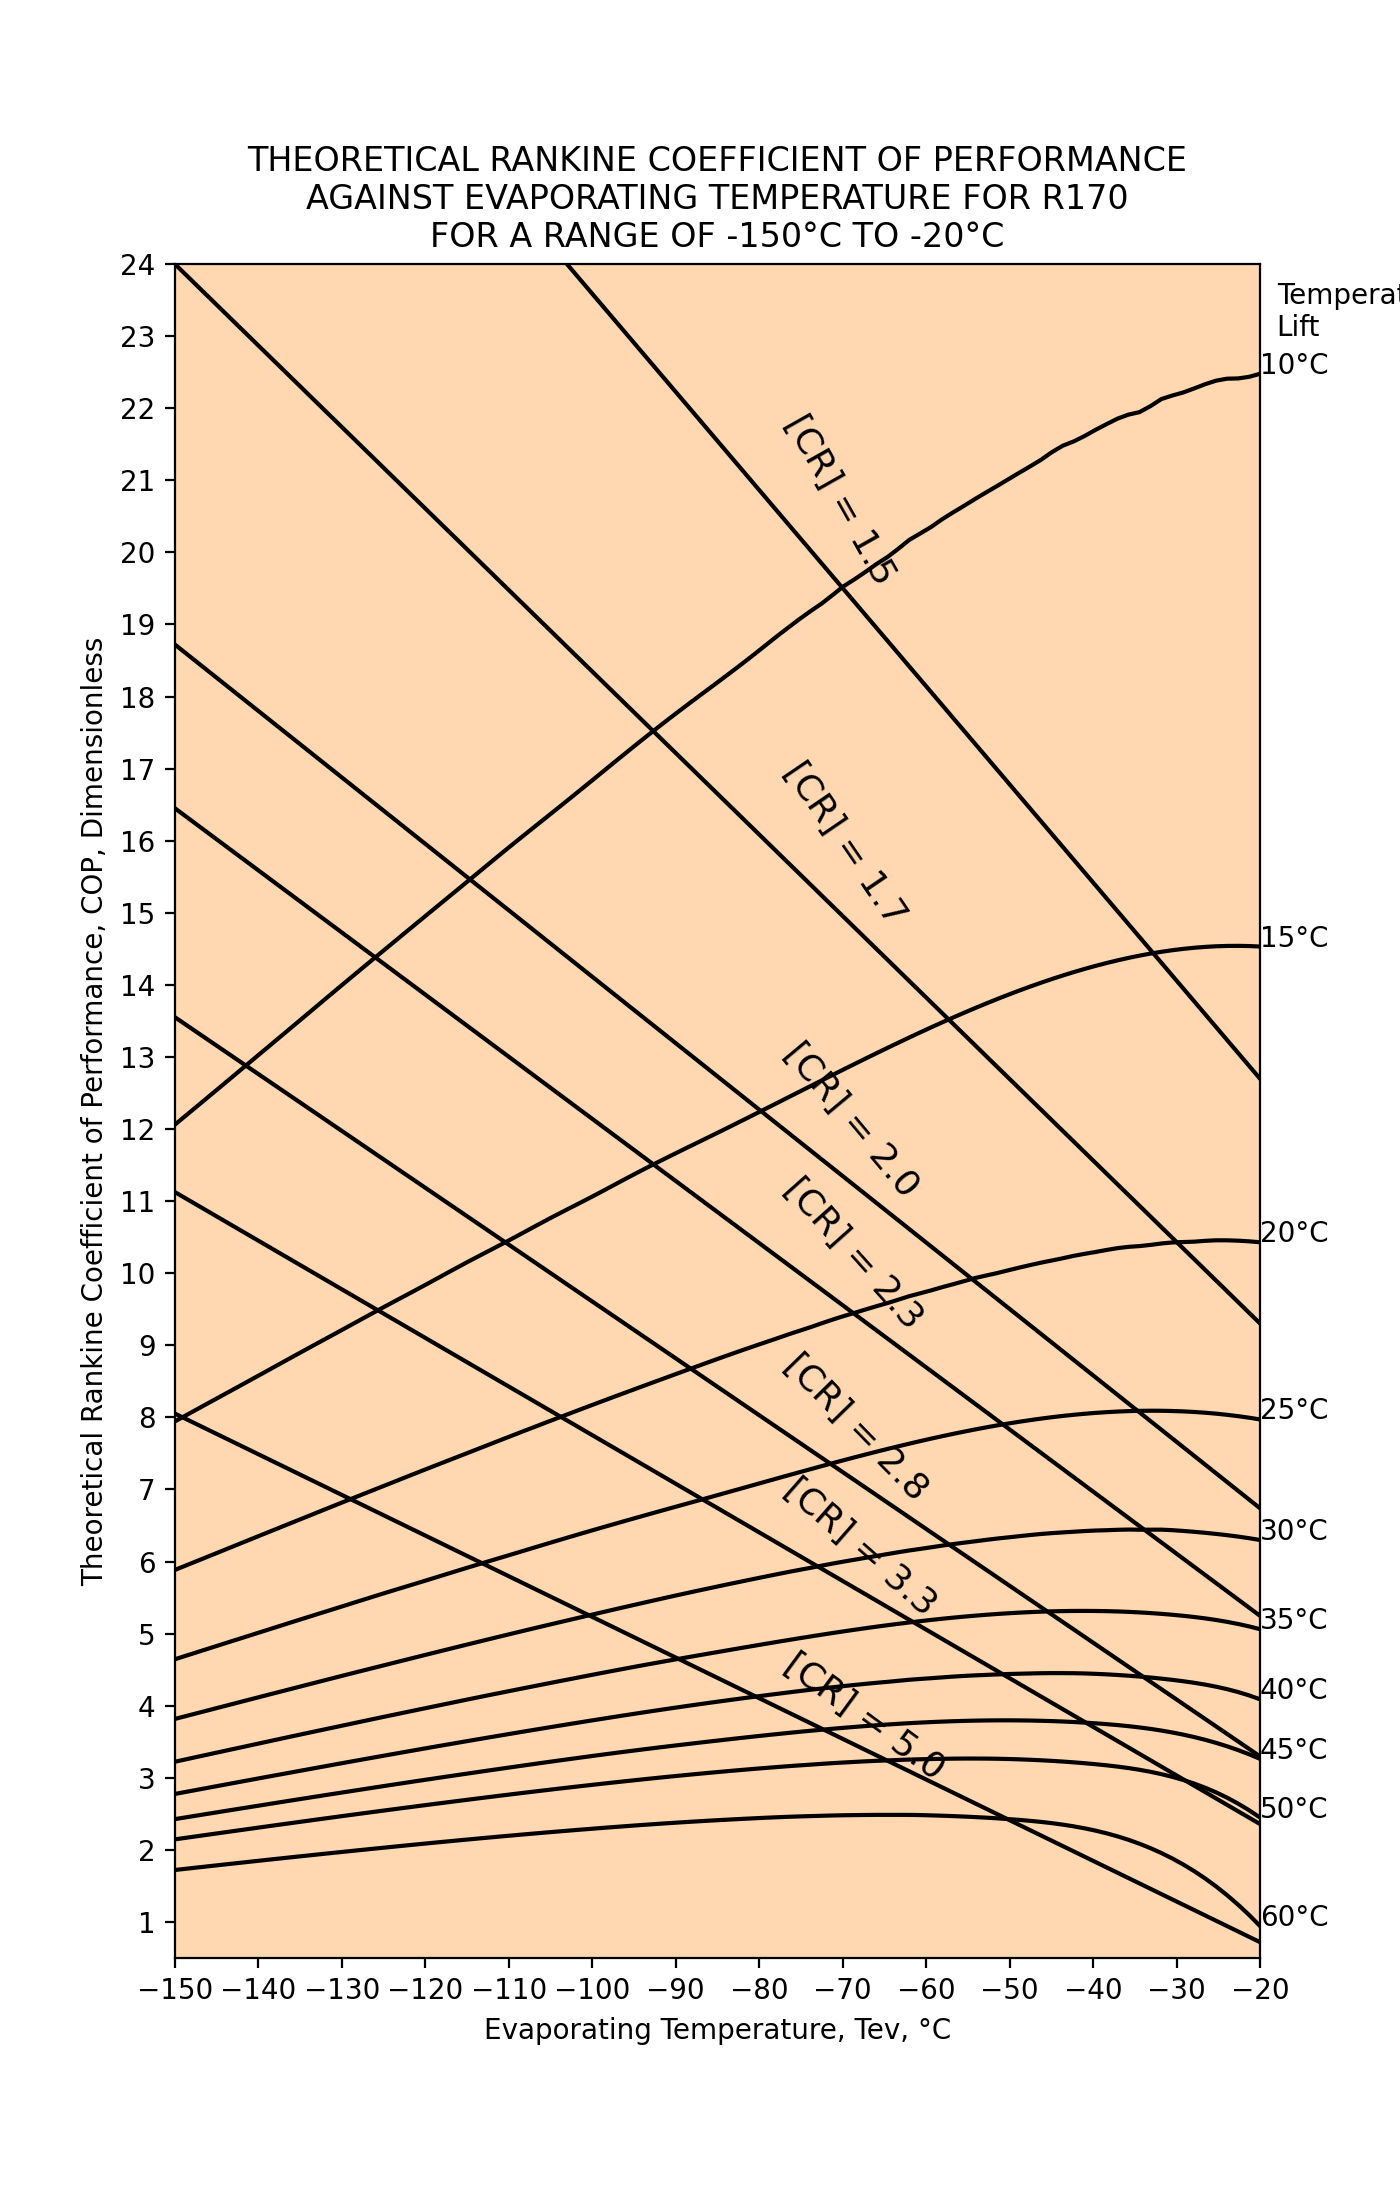

In [44]:
#Tco-Tev Plots
fig = plt.figure(figsize = (7, 11))
ax = fig.add_subplot(111)
Rdata = pd.DataFrame()
for tcotev in diffs:
    tev = [i for i in avail_temp if i + tcotev in avail_temp]
    #This is to make sure that all Tev values chosen also have their corresponding Tco value in the properties table.
    
    data = pd.DataFrame()
    data["Tev"] = tev
    data["Tco-Tev"] = [tcotev for i in range(len(tev))]
    data["Tco"] = data["Tco-Tev"] + data["Tev"]
    data["Pev"] = [properties.loc[x, "Pressure"] for x in data["Tev"]]
    data["Pco"] = [properties.loc[x, "Pressure"] for x in data["Tco"]]
    data["H1"] = [properties.loc[x, "Enthalpy_liquid"] for x in data["Tco"]]
    data["H2"] = [properties.loc[x, "Enthalpy_vapor"] for x in data["Tev"]]
    data["H4"] = [properties.loc[x, "Enthalpy_vapor"] for x in data["Tco"]]
    data["S2"] = [properties.loc[x, "Entropy_vapor"] for x in data["Tev"]]
    data["S4"] = [properties.loc[x, "Entropy_vapor"] for x in data["Tco"]]
    data["H3"] = H3_(data["H4"], data["Tco"], data["S2"], data["S4"])
    data["COP"] = COP(data["H1"], data["H2"], data["H3"])
    data["CR"] = data["Pco"] / data["Pev"]
    data["dx"] = data["S2"] - data["S4"]
    temp = data[data["dx"] > 0] #To remove negative datapoints with negative values of S2-S4
    x = temp["Tev"]
    y = temp["COP"]
    
    #Table of Tev, COP, CR and Tco-Tev
    Rdata = pd.concat([Rdata, temp[["Tev", "COP", "CR", "Tco-Tev"]]], axis = 0, ignore_index = True) 

    #To get smooth lines.
    from scipy import interpolate
    xn = np.linspace(-150, -20, 100)
    splines = interpolate.make_interp_spline(x, y)
    yn = splines(xn)
    ax.plot(xn, yn, color = "black")
    #labelling the lines using the last point on the x-axis(-20) and  the last point on the y-axis
    ax.text(-20, yn[-1], str(tcotev) + "°C")

    
#CR Plots
#points is a list of approximated compression ratio values gotten from the calculations done above(the table Rdata).
#each point appears in the table at least three times.
points = [1.5, 1.7, 2.0, 2.3, 2.8, 3.3, 5.0]
for point in points:
    #rounding off CR values to 1 d.p.
    mask = Rdata["CR"].apply(lambda x : round(x, 1)) == point    
    pdata = Rdata[mask]
    x = pdata["Tev"].values
    y = pdata["COP"].values
    
    #interpolation
    temp = len(x) // 2
    xn = pd.Series(np.linspace(-150, -20, 10))
    x2, x3, y2, y3 = (x[0]  + x[temp]) / 2, (x[-1] + x[temp]) / 2, (y[0] + y[temp]) / 2, (y[-1] + y[temp]) / 2    
    yn = xn.apply(lambda x : interpo(x, x2, x3, y2, y3))
    xn = xn.values
    yn = yn.values
    
    yx = abs(yn[0] - yn[-1])
    yt = yn[-1] + (yx / 2)
    #angle for rotating text. Based on the triangle formed by the line with the x and y axes. not very efficient though.
    ang = (math.atan(10 / yx) * (180 / math.pi)) - 90
    
    #labelling the CR lines
    ax.text(xn[5], yn[5] - 1.0,  "[CR] = " + str(point), rotation = ang, size = 13)
    ax.plot(xn, yn, label = str(point), color = "black")
    
#To label the chart.
plt.text(-18, 23,  "Temperature\nLift")
Rdata.to_csv("R170data.csv", index = False)
ax.set_facecolor("xkcd:light peach")
plt.xticks(np.arange(-170, -15, 10))
plt.yticks(np.arange(1, 24.5, 1))        
plt.xlim(-150, -20)
plt.ylim(0.5, 24)
plt.xlabel("Evaporating Temperature, Tev, °C")
plt.ylabel("Theoretical Rankine Coefficient of Performance, COP, Dimensionless")
plt.title("THEORETICAL RANKINE COEFFICIENT OF PERFORMANCE\nAGAINST EVAPORATING TEMPERATURE FOR R170\nFOR A RANGE OF -150°C TO -20°C")
plt.savefig("R170_plot.png", orientation = "portrait", bbox_inches = "tight")

## Discussion

In [45]:
table = Rdata[["COP", "CR", "Tco-Tev", "Tev"]]
table

,COP,CR,Tco-Tev,Tev
0,9.625810,5.000000,10,-175
1,10.113486,6.500000,10,-170
2,10.599688,5.400000,10,-165
3,11.087127,4.153846,10,-160
4,11.576884,3.814815,10,-155
...,...,...,...,...
324,2.485056,6.500629,60,-62
325,2.480489,6.301185,60,-60
326,2.425903,5.467626,60,-50
327,2.274522,4.843461,60,-40


In [46]:
chosen_tev1 = Rdata[Rdata["Tev"] == -60]
chosen_tev1

,Tev,COP,CR,Tco-Tev
28,-60,20.307305,1.456900,10
107,-60,9.742258,2.052538,20
178,-60,6.187029,2.809885,30
240,-60,4.376748,3.752937,40
294,-60,3.258628,4.907464,50
325,-60,2.480489,6.301185,60


From the table above, we can see that at Tev = -60°C, the following are true:

   * ##### Coefficient of Performance decreses as the temperature lift increases.
    
   * ##### Compression Ratio increases as temperature lift increases.
    

In [47]:
chosen_tev2 = Rdata[Rdata["Tev"] == -30]
chosen_tev2

,Tev,COP,CR,Tco-Tev
43,-30,22.189823,1.335620,10
121,-30,10.429475,1.746500,20
192,-30,6.431068,2.242507,30
212,-30,5.256276,2.525886,35
250,-30,4.351401,2.834915,40
269,-30,3.617671,3.171568,45
301,-30,2.996985,3.538006,50
328,-30,1.849358,4.373861,60


From the table above, we can see that at Tev = -30°C, the following are true:

   * ##### Coefficient of Performance decreses as the temperature lift increases.
    
   * ##### Compression Ratio increases as temperature lift increases.
    

We also notice that the CR values are slightly higher when Tev is -60°C than when Tev is -30°C.

<IPython.core.display.Javascript object>


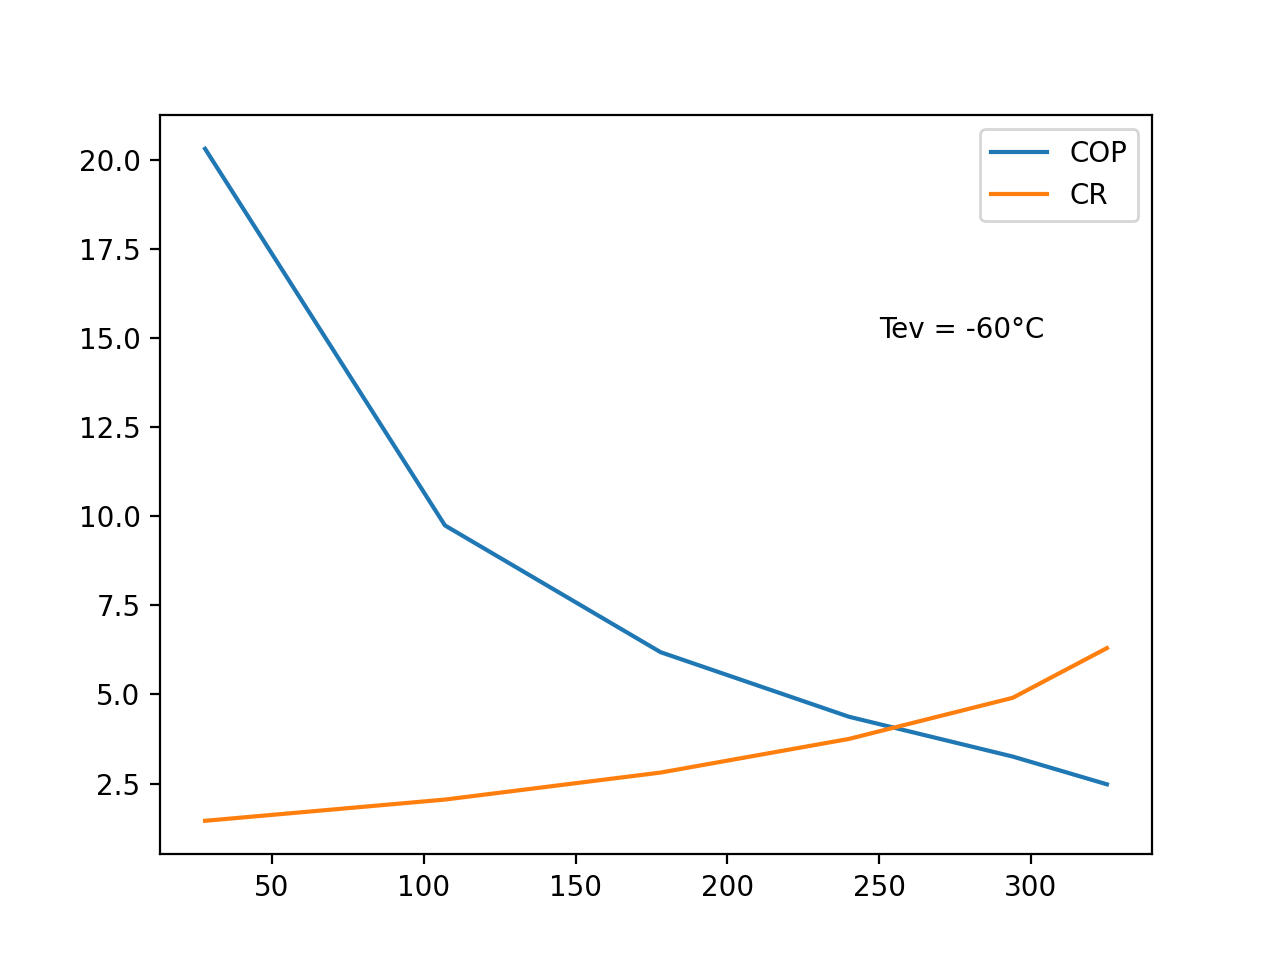

<IPython.core.display.Javascript object>


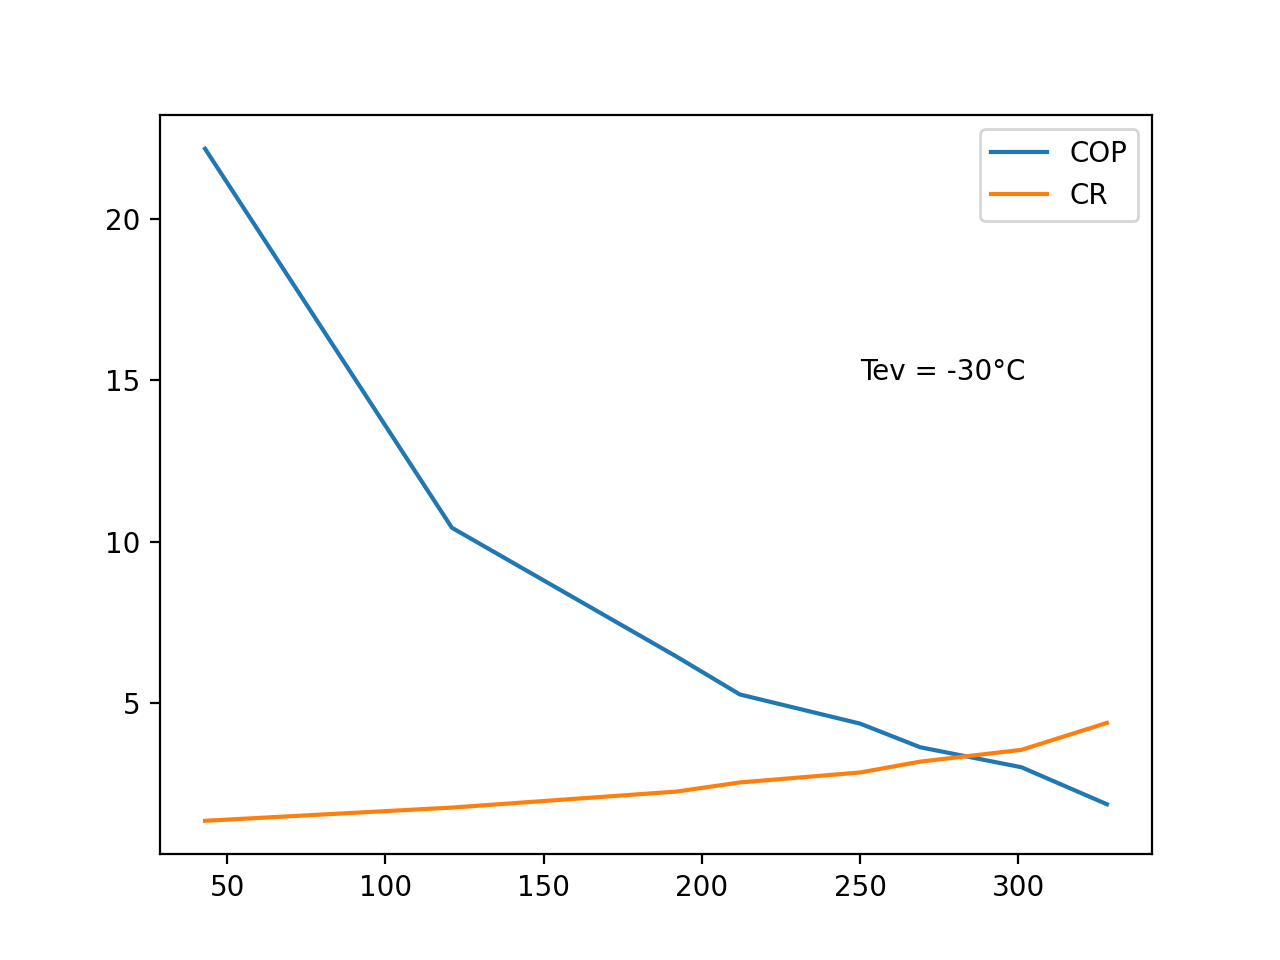

Text(250, 15, 'Tev = -30°C')

In [48]:
chosen_tev1[["COP", "CR"]].plot()
plt.text(250, 15, "Tev = -60°C")
chosen_tev2[["COP", "CR"]].plot()
plt.text(250, 15, "Tev = -30°C")


From both tables above, chosen_tev1 and chosen_tev2 with Tev = -60°C and -30°C respectively, we can draw the following conclusions:
   * ##### Lower evaporating temperature gives higher CR compared to an higher evaporating temperature for the same temperature lift.